In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Part 1: Skyline Eagle Fly¶

In [27]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) 
    lat = np.random.randint(-10,10, size=3)  
                                              
                                            
    dist1 = np.array([-7,-5])                
    dist2 = np.array([2,-7])
    dist3 = np.array([8,-8])
    
    distX = dist1[0] + dist2[0] + dist3[0]
    distY = dist1[1] + dist2[1] + dist3[1]

    dist_total = dist1 + dist2 + dist3                       
    disp = np.sqrt((distX)**2 + (distY)**2)                              
    alpha = 10**-6
    theta = np.arctan(distY/alpha + distX)                            
    theta = np.degrees(theta)               
    
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()

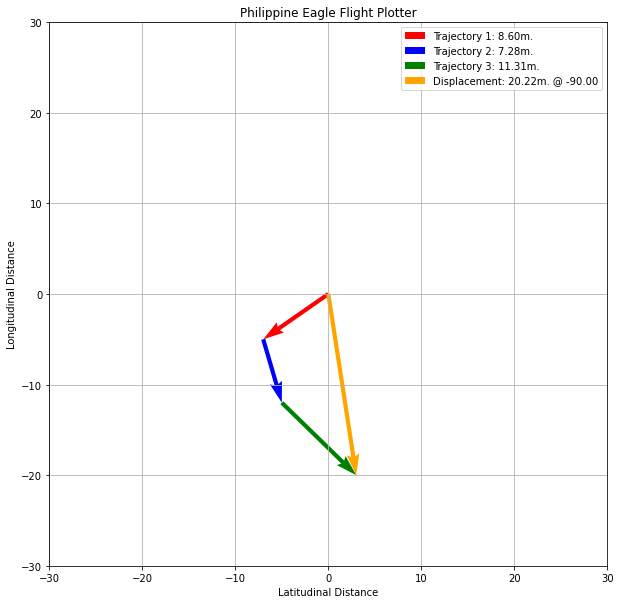

In [30]:
track_eagle(make_figs=True)

Guide questions:

1.What is the use of the variable α ?

Answer: The use of variable α was use to represent the vectors, matrices and functions in the program.

2.Kindly explain the process of plotting the eagle flight vectors.

Answer: In plotting the eagle flight vectors the first process was to setup an array for each vectors then compute for the resultant vector, magnitude of the displacement and the angle of displacement. Then Plot the figure size, title, x and y limits, x and y labels and the grid.To determine the trajectory of the eagles flight vectors we need to assign an array in each distance and change the colors of every distance to easily determine what trajectory it belong.

3.Provide a flow chart describing the 'track_eagle' function. Please use LucidCharts or similar apps in making charts.



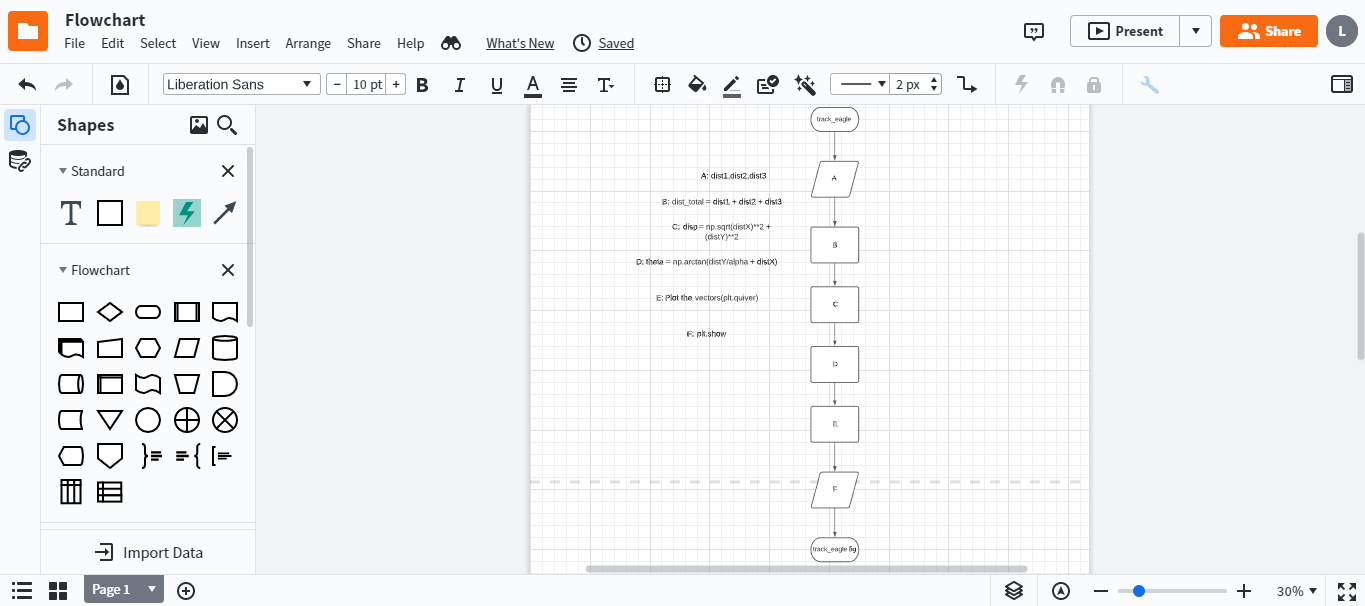

In [41]:
from PIL import Image
img = Image.open('Flowchart1.2.PNG')
img

Note: provide 4 screenshots of the "Philippine Eagle Flight Plotter" figure.

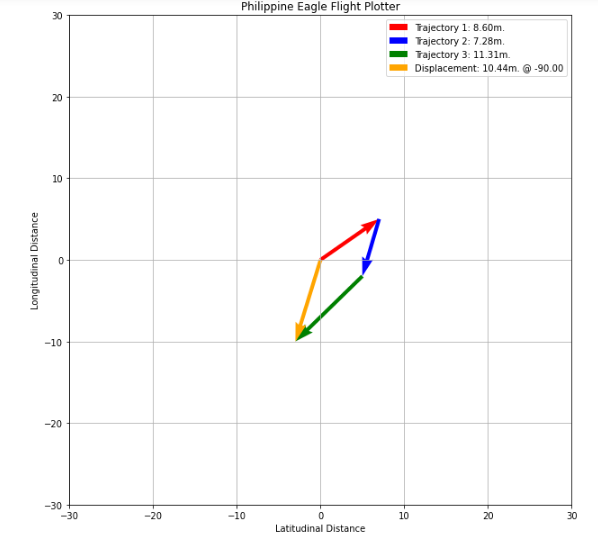

In [18]:
from PIL import Image
img = Image.open('EAGLE1.PNG')
img

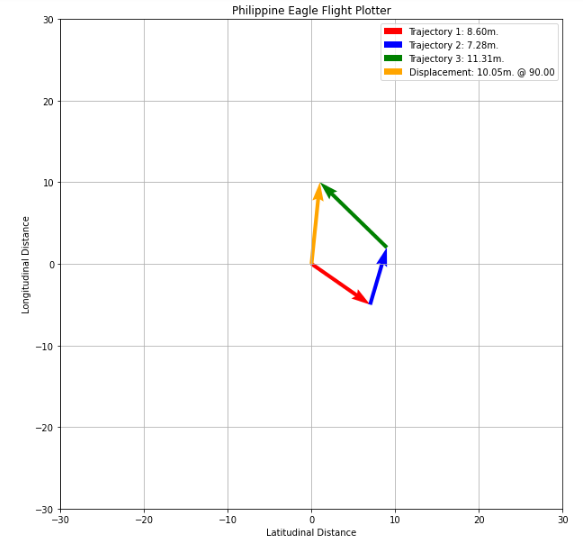

In [19]:
from PIL import Image
img = Image.open('EAGLE2.PNG')
img

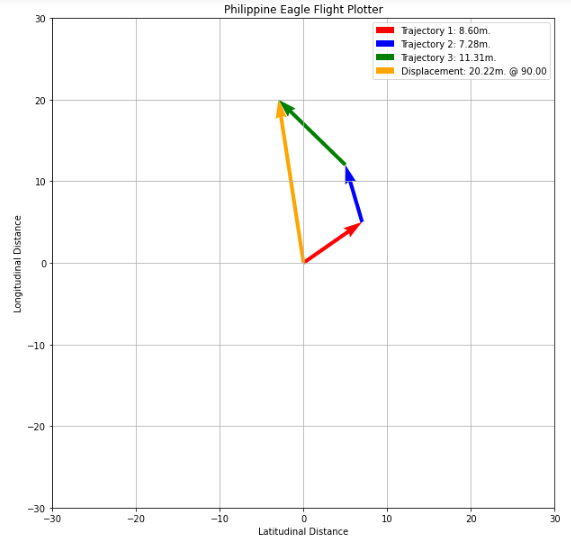

In [20]:
from PIL import Image
img = Image.open('EAGLE3.PNG')
img

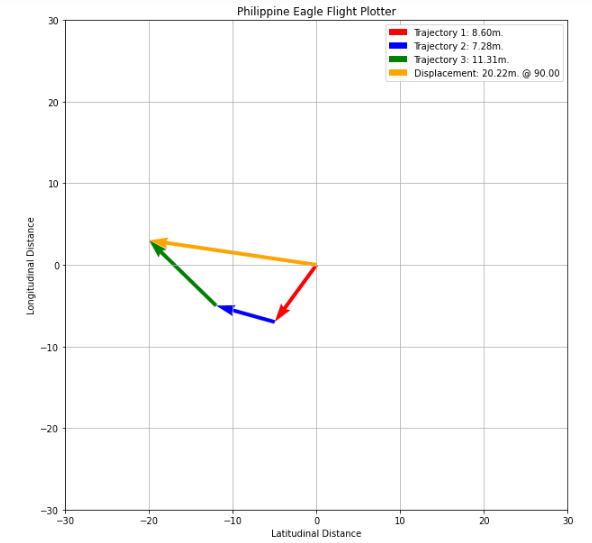

In [22]:
from PIL import Image
img = Image.open('EAGLE4.PNG')
img

# Part 2: Reverse Engineering

In [37]:
def eagle_kinematics(s, t):
    shapes = 4
    vec = np.zeros((shapes -1,))          #np.zero cause the value of vector to zero  
    acce = np.zeros((shapes-2,))         #np.zero cause the value of acceleration to zero  
    rex = np.array([t**3, t**2, t, 1])   #This is the vector of the rex
    
    
    #The motion of the Eagle
    if s.shape == (shapes,):
        vector = np.array([3*s[0],2*s[1], s[2]]) 
        acceleration = np.array([2*vector[0],vector[1]]) 
        
        
        #Computation of the Motion
        ST = np.sum(np.multiply(s, rex)) #The array of x and rex was been multiplied  
        VT = np.sum(np.multiply(vector, rex[1:])) #The array of vector and rex was been multiplied but the first value of rex will be excluded in the computation  
        AT = np.sum(np.multiply(acceleration, rex[2:])) #The array of the vector and rex was been multiplied but the second value of rex will be excluded in the computation
        
        
        
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({shapes},)')
    return ST, VT, AT 

In [38]:
x = np.array([2,1,3,2]) # vector s 
t = 2 # variable needs to be multiplied in vector t
eagle_kinematics(x, t) 

Input displacement vector is not valid. Make sure that the vector shape is (4,)


(28, 31, 26)

# Guide questions:

1.What is the function for? Explain the inputs, process, functions used, and the outputs.

Answer: The purpose of the function is to determine the eagles' flight or the how the eagle moved from one direction to another.The motion 1 and 2 denotes the output that a vector will have.Also the functions codes used to find out the value of vectors are np.multiply and np.sum. In addition, it also used np.zero and np.array to contain the vectors. The executed outputs was the last vector movement of an eagle.

2.Kindly provide equations for st , vt , and at basing on their code.

$s_t(ST) = ∑(s * rex)$
    
$v_t(VT) = ∑(vector * rex[1:])$
    
$a_t(AT) = ∑(acceleration * rex[2:])$


3. Re-type the 'eagle_kinematics' function in your jupyter notebook. Write a brief description of the function before the code cell in a markdown. Include the equations from (2.).

def - it define an objects to create a function.

np.zeroes - it makes the value of the array to zero.

np.array - a list of vectors.

np.sum - it sums up the element of an array.

np.multiply - it multiplies the operands.

if else - it is a condition statement.

# Part 3: Bebang's Online Business

You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

Credits to Sebastian Cale Zaraga the owner of part 3 codes

In [39]:
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (5,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[0], profit[2]))
        week3 = np.array((reach[2], profit[3]))
        week4 = np.array((reach[3], profit[4]))
        
        end   = np.array((reach[1], profit[1])) 
    
        weekX = week1[0] + week2[0] + week3[0] + week4[0]
        weekY = week1[1] + week2[1] + week3[1] + week4[1]

        week_total = week1 + week2 + week3 + week4     
        week_performance = np.sqrt((weekX)**2 + (weekY)**2)
        alpha = 10**-6
        reach_gradient = np.arctan(weekY/alpha + weekX)   
        
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='lightgreen', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        
        plt.quiver(np.add(week1[0],week2[0]), np.add(week1[1], week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        plt.quiver(np.add(end[0],week3[0]), np.add(end[1], week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
        
        
        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Somethings with your profit/reach')         

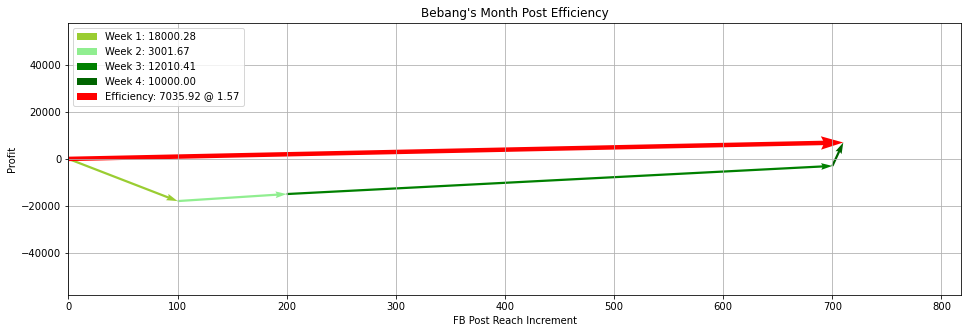

In [40]:
profit= np.array([-18000, -15000,  3000, 12000, 10000])  
reach = np.array([100, 200, 500, 10])             

month_profit_trace(profit, reach, make_figs=False) 

# Guide questions:

1. What is the relationship between the FB post reach and the profit?

Answer: The relation ship between FB post reach and the profit it just like a normal spent and the amount addded in the capital.As we can see in graph the more Bebang sell or post in FB the more the profit she will have.

2. Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?

Answer: The profit is dependent on the FB post.

3.Kindly explain the process of plotting the post efficiency vectors.

Answer: In the codes above the week1 up to week4 are depending in given values of the profit and reach. Using the functions that was been used in part one in this Lab activity both of them used the same functions but there are differences between them especially in the plotting of the vectors. The plotting start from the origin which is in the left side then the values of the vectors are dependent to the values of profit and reach. In the end to end arrow head the week4 cannot be placed there but there was another vector named "end" that push the week for in its position.

4. Provide a necessary equations that are representative to finding the performanceweek and reachgradient .

   Answer: In performanceweek the equation that was been used to find the value is:

week_performance = $np.sqrt((weekX)**2 + (weekY)**2)$
    
For the value of the reachgradient is:
    
reach_gradient = $np.arctan(weekY/alpha + weekX)$


5.Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.

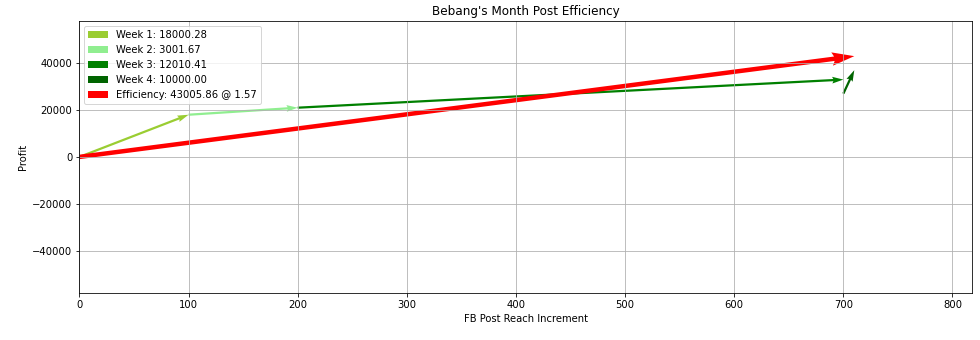

In [10]:
from PIL import Image
img = Image.open('BEBANG1.PNG')
img

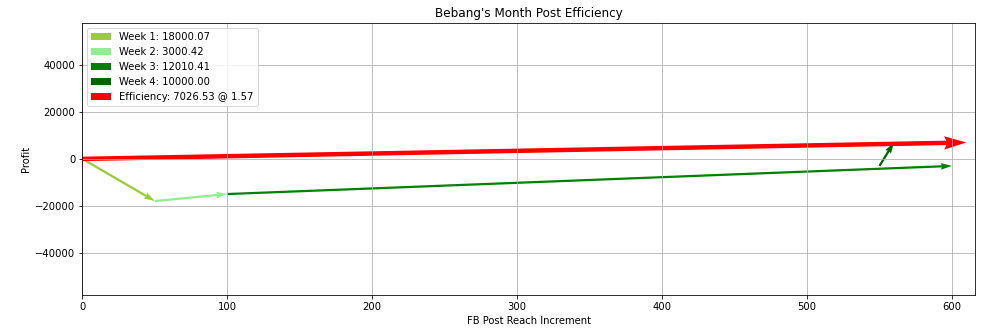

In [11]:
from PIL import Image
img = Image.open('BEBANG2.PNG')
img

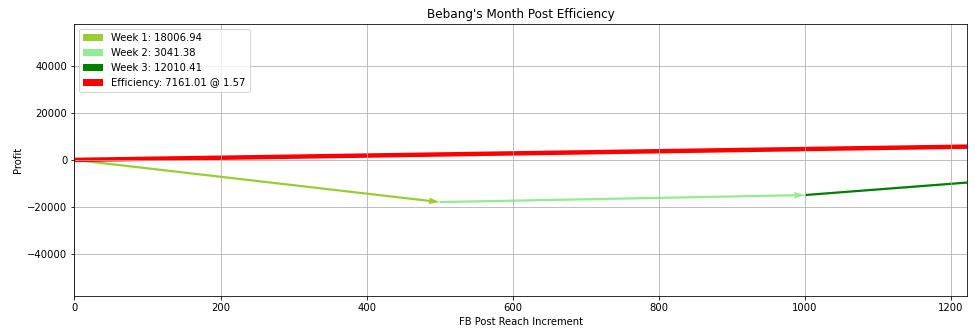

In [12]:
from PIL import Image
img = Image.open('BEBANG3.PNG')
img

The pictures shows that there are changes happened in the values every week.

6.What can be observed and concluded with the behavior of the vectors with respect to post efficiency?


Answer: To conclude, the amount of money that Bebang can earn in her profit is not big enough but it's still raising upward as long as the demand in her FB post is increasing there are chances that she can earn a lot.